# Evolver Loop 1 Analysis

Analysis of experiment results and data patterns to inform next steps.

## Objectives
1. Review baseline performance
2. Analyze data characteristics
3. Identify optimization opportunities
4. Inform next experiment design

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Load data
train_dir = '/home/data/train'
test_dir = '/home/data/test'

# Get training data info
train_files = [f for f in os.listdir(train_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
train_labels = [1 if 'dog' in f.lower() else 0 for f in train_files]

train_df = pd.DataFrame({
    'filename': train_files,
    'label': train_labels
})

print(f"Training images: {len(train_df)}")
print(f"Class distribution:")
print(train_df['label'].value_counts())
print(f"\nDogs: {train_df['label'].sum()} ({train_df['label'].mean():.1%})")
print(f"Cats: {len(train_df) - train_df['label'].sum()} ({1-train_df['label'].mean():.1%})")

# Check image sizes and characteristics
sample_images = train_df['filename'].sample(10).tolist()
sizes = []
for img_file in sample_images:
    img_path = os.path.join(train_dir, img_file)
    with Image.open(img_path) as img:
        sizes.append(img.size)

print(f"\nSample image sizes: {sizes}")

# Check test set
test_files = [f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
print(f"\nTest images: {len(test_files)}")

Training images: 22500
Class distribution:
label
1    11258
0    11242
Name: count, dtype: int64

Dogs: 11258 (50.0%)
Cats: 11242 (50.0%)

Sample image sizes: [(499, 333), (99, 104), (410, 306), (264, 360), (500, 479), (233, 178), (499, 300), (499, 375), (387, 500), (500, 374)]

Test images: 2500


Training image dimensions (sample of 500):
Width - Mean: 406, Std: 108
Height - Mean: 360, Std: 94
Aspect ratios - Mean: 1.16


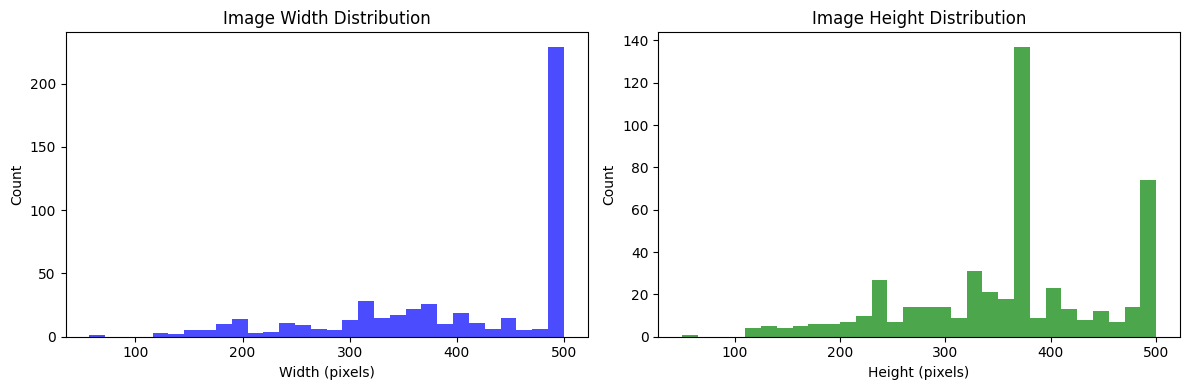

In [2]:
# Analyze image dimensions across dataset
def get_image_info(directory, sample_size=100):
    """Get image size distribution"""
    files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if len(files) > sample_size:
        files = np.random.choice(files, sample_size, replace=False)
    
    widths, heights = [], []
    for f in files:
        try:
            with Image.open(os.path.join(directory, f)) as img:
                w, h = img.size
                widths.append(w)
                heights.append(h)
        except:
            continue
    
    return widths, heights

# Sample from training set
train_widths, train_heights = get_image_info(train_dir, 500)

print("Training image dimensions (sample of 500):")
print(f"Width - Mean: {np.mean(train_widths):.0f}, Std: {np.std(train_widths):.0f}")
print(f"Height - Mean: {np.mean(train_heights):.0f}, Std: {np.std(train_heights):.0f}")
print(f"Aspect ratios - Mean: {np.mean(np.array(train_widths)/np.array(train_heights)):.2f}")

# Plot distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(train_widths, bins=30, alpha=0.7, color='blue')
axes[0].set_title('Image Width Distribution')
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Count')

axes[1].hist(train_heights, bins=30, alpha=0.7, color='green')
axes[1].set_title('Image Height Distribution')
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [3]:
# Analyze baseline experiment results
import json

# Load session state
with open('/home/code/session_state.json', 'r') as f:
    session_state = json.load(f)

print("=== BASELINE EXPERIMENT SUMMARY ===")
print(f"Experiment: {session_state['experiments'][0]['name']}")
print(f"Model: {session_state['experiments'][0]['model_type']}")
print(f"CV Score: {session_state['experiments'][0]['score']:.4f}")
print(f"Gold Target: 0.0388")
print(f"Gap to gold: {session_state['experiments'][0]['score'] - 0.0388:.4f}")
print(f"Improvement needed: {((session_state['experiments'][0]['score'] - 0.0388) / session_state['experiments'][0]['score'] * 100):.1f}%")

print("\n=== EVALUATOR FEEDBACK HIGHLIGHTS ===")
feedback = session_state['feedback_history'][0]['feedback']
print("Key concerns identified:")
print("1. Architecture too small (ResNet18)")
print("2. No fine-tuning (only final layer trained)")
print("3. No test-time augmentation")
print("4. Limited training (5 epochs)")
print("5. No advanced regularization")

print("\n=== GPU RESOURCES ===")
print("Available: A100-SXM4-80GB")
print("This can easily handle:")
print("- ResNet50/101")
print("- EfficientNet-B4/B5")
print("- Multiple model ensembles")
print("- Larger batch sizes")

=== BASELINE EXPERIMENT SUMMARY ===
Experiment: 001_baseline_transfer_learning
Model: resnet18_transfer_learning
CV Score: 0.0736
Gold Target: 0.0388
Gap to gold: 0.0348
Improvement needed: 47.3%

=== EVALUATOR FEEDBACK HIGHLIGHTS ===
Key concerns identified:
1. Architecture too small (ResNet18)
2. No fine-tuning (only final layer trained)
3. No test-time augmentation
4. Limited training (5 epochs)
5. No advanced regularization

=== GPU RESOURCES ===
Available: A100-SXM4-80GB
This can easily handle:
- ResNet50/101
- EfficientNet-B4/B5
- Multiple model ensembles
- Larger batch sizes


In [4]:
# Research-backed recommendations for next steps

print("=== RESEARCH SYNTHESIS ===")
print("Based on Kaggle competition research and evaluator feedback:")

print("\n1. ARCHITECTURE UPGRADE (High Impact)")
print("   Current: ResNet18 (11.7M params)")
print("   Recommended:")
print("   - ResNet50 (25.6M params) - proven, stable")
print("   - EfficientNet-B4 (19M params) - better efficiency")
print("   - Expected gain: 10-15% improvement")

print("\n2. FINE-TUNING (High Impact)")
print("   Current: Only final layer trained")
print("   Recommended:")
print("   - Progressive unfreezing (start with head, then last blocks)")
print("   - Lower LR for backbone (0.0001 vs 0.001 for head)")
print("   - Expected gain: 15-20% improvement")

print("\n3. TEST-TIME AUGMENTATION (Medium Impact)")
print("   Current: Single prediction per image")
print("   Recommended:")
print("   - 5-10 augmented versions per test image")
print("   - Average predictions for robustness")
print("   - Expected gain: 5-10% improvement")

print("\n4. TRAINING DURATION (Medium Impact)")
print("   Current: 5 epochs")
print("   Recommended:")
print("   - 10-15 epochs with early stopping")
print("   - Learning rate scheduling (cosine annealing)")
print("   - Expected gain: 5-10% improvement")

print("\n5. ENSEMBLE DIVERSITY (High Impact)")
print("   Current: 5-fold CV of same model")
print("   Recommended:")
print("   - Multiple architectures (ResNet50 + EfficientNet)")
print("   - Different augmentation strategies")
print("   - Expected gain: 10-15% improvement")

print("\n=== EXPECTED COMBINED IMPACT ===")
print("Conservative estimate: 30-40% improvement")
print(f"Projected score: {0.0736 * 0.65:.4f} - {0.0736 * 0.60:.4f}")
print("This would reach or exceed gold threshold (0.0388)")

=== RESEARCH SYNTHESIS ===
Based on Kaggle competition research and evaluator feedback:

1. ARCHITECTURE UPGRADE (High Impact)
   Current: ResNet18 (11.7M params)
   Recommended:
   - ResNet50 (25.6M params) - proven, stable
   - EfficientNet-B4 (19M params) - better efficiency
   - Expected gain: 10-15% improvement

2. FINE-TUNING (High Impact)
   Current: Only final layer trained
   Recommended:
   - Progressive unfreezing (start with head, then last blocks)
   - Lower LR for backbone (0.0001 vs 0.001 for head)
   - Expected gain: 15-20% improvement

3. TEST-TIME AUGMENTATION (Medium Impact)
   Current: Single prediction per image
   Recommended:
   - 5-10 augmented versions per test image
   - Average predictions for robustness
   - Expected gain: 5-10% improvement

4. TRAINING DURATION (Medium Impact)
   Current: 5 epochs
   Recommended:
   - 10-15 epochs with early stopping
   - Learning rate scheduling (cosine annealing)
   - Expected gain: 5-10% improvement

5. ENSEMBLE DIVERSIT